R^2 Score: 0.9782294499790948


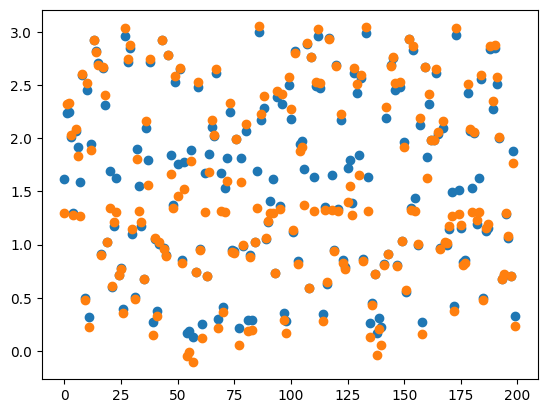

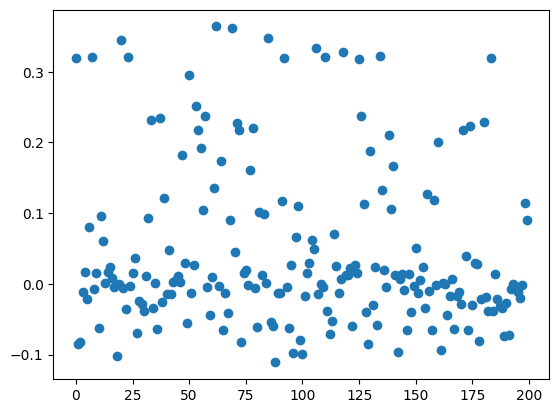

In [46]:
import sklearn.neural_network
import torch
import sklearn
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
Data = pd.read_pickle("Sim_Data.pkl")
#y = np.transpose(np.vstack((Data["x_tag"].to_numpy(),Data["y_tag"].to_numpy(),Data["z_tag"].to_numpy())))
y = Data["y_tag"].to_numpy()
phases = np.vstack(Data["Phases"].to_numpy())
powers = np.vstack(Data["Powers"].to_numpy())
X = np.hstack((phases,powers))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
mlp = sklearn.neural_network.MLPRegressor(random_state=42, max_iter=2000, tol=0.1,hidden_layer_sizes=(1000,),activation="relu",solver="adam",alpha=0.01)
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with the scaled data
mlp.fit(X_train_scaled, y_train)
y_hat = mlp.predict(X_test_scaled)
print("R^2 Score:", mlp.score(X_test_scaled, y_test))

plt.figure()
x = np.arange(0,len(y_test))
plt.scatter(x,y_test)
plt.scatter(x,y_hat)
plt.show()
plt.figure()
e = y_test-y_hat
plt.scatter(x,e)
plt.show()

